In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
matches_data=pd.read_csv("/content/IPL Matches 2008-2020.csv")
deliveries_data = pd.read_csv("/content/IPL Ball-by-Ball 2008-2020.csv")

In [ ]:
matches_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
matches_data.shape


(816, 17)

In [ ]:
matches_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
deliveries_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1.0,6.0,5.0,RT Ponting,BB McCullum,AA Noffke,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1.0,6.0,6.0,BB McCullum,RT Ponting,AA Noffke,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1.0,7.0,1.0,BB McCullum,RT Ponting,Z Khan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1.0,7.0,2.0,BB McCullum,RT Ponting,Z Khan,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1.0,7.0,3.0,RT Ponting,BB McCullum,Z Khan,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
deliveries_data.shape

(80758, 18)

In [ ]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80758 entries, 0 to 80757
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                80758 non-null  int64  
 1   inning            80757 non-null  float64
 2   over              80757 non-null  float64
 3   ball              80757 non-null  float64
 4   batsman           80757 non-null  object 
 5   non_striker       80757 non-null  object 
 6   bowler            80757 non-null  object 
 7   batsman_runs      80757 non-null  float64
 8   extra_runs        80757 non-null  float64
 9   total_runs        80757 non-null  float64
 10  non_boundary      80757 non-null  float64
 11  is_wicket         80757 non-null  float64
 12  dismissal_kind    4011 non-null   object 
 13  player_dismissed  4011 non-null   object 
 14  fielder           2897 non-null   object 
 15  extras_type       4584 non-null   object 
 16  batting_team      80757 non-null  object

In [ ]:
print(deliveries_data.describe())

                  id        inning          over          ball  batsman_runs  \
count   80758.000000  80757.000000  80757.000000  80757.000000  80757.000000   
mean   456190.311139      1.483029      9.141573      3.621234      1.189891   
std     82112.273365      0.499715      5.667866      1.811318      1.569754   
min     59801.000000      1.000000      0.000000      1.000000      0.000000   
25%    392211.000000      1.000000      4.000000      2.000000      0.000000   
50%    419160.000000      1.000000      9.000000      4.000000      1.000000   
75%    548314.000000      2.000000     14.000000      5.000000      1.000000   
max    598016.000000      2.000000     19.000000      9.000000      6.000000   

         extra_runs    total_runs  non_boundary     is_wicket  
count  80757.000000  80757.000000  80757.000000  80757.000000  
mean       0.072576      1.262466      0.000087      0.049668  
std        0.361162      1.560178      0.009310      0.217258  
min        0.000000    

#1 ) Some basic analysis :

## Total Matches Played :

In [ ]:
matches_data.shape[0]

816

## Venues Played At :

In [ ]:
matches_data["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

##Total teams participated :

In [ ]:
matches_data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

## Maximum Toss Winner Teams :

In [ ]:
matches_data['toss_winner'].value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

In [ ]:
matches_data['toss_winner'].value_counts().index[0]

'Mumbai Indians'

## Most Player of the match :

In [ ]:
matches_data['player_of_match'].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

In [ ]:
matches_data['player_of_match'].value_counts().index[0]

'AB de Villiers'

#2) Particular batsman analysis :

###  Lets do in-depth analysis for 'Virat Kohli' which is an Indian cricketer !

In [ ]:
deliveries_data['batsman'].unique()

array(['RT Ponting', 'BB McCullum', 'DJ Hussey', 'Mohammad Hafeez',
       'SC Ganguly', 'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke',
       'P Kumar', 'Z Khan', 'SB Joshi', 'W Jaffer', 'JH Kallis',
       'R Dravid', 'V Kohli', 'K Goel', 'MEK Hussey', 'JR Hopes',
       'SK Raina', 'JDP Oram', 'S Badrinath', 'PA Patel', 'ML Hayden',
       'MS Dhoni', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'S Dhawan', 'G Gambhir',
       'SK Warne', 'D Salunkhe', 'SK Trivedi', 'V Sehwag', 'SR Watson',
       'M Kaif', 'DS Lehmann', 'RA Jadeja', 'M Rawat', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'WP Saha', 'AS Yadav', 'A Symonds', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'AC Gilchrist', 'Y Venugopal Rao',
       'VVS Laxman', 'RG Sharma', 'SB Styris', 'LR Shukla', 'PP Chawla',
       'Kamran Akmal', 'DPMD Jayawardene'

In [ ]:
filt = deliveries_data['batsman']=='V Kohli'
df_kohli = deliveries_data[filt]

In [ ]:
df_kohli.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [ ]:
df_kohli['dismissal_kind'].value_counts()

caught               41
bowled               12
run out               5
lbw                   4
stumped               2
caught and bowled     1
Name: dismissal_kind, dtype: int64

In [ ]:
df_kohli['batsman_runs'].unique()

array([0., 1., 4., 6., 2., 3.])

In [ ]:
df_kohli['batsman_runs'].value_counts()

0.0    628
1.0    607
4.0    169
2.0     87
6.0     56
3.0      3
Name: batsman_runs, dtype: int64

<Axes: xlabel='batsman_runs', ylabel='Count'>

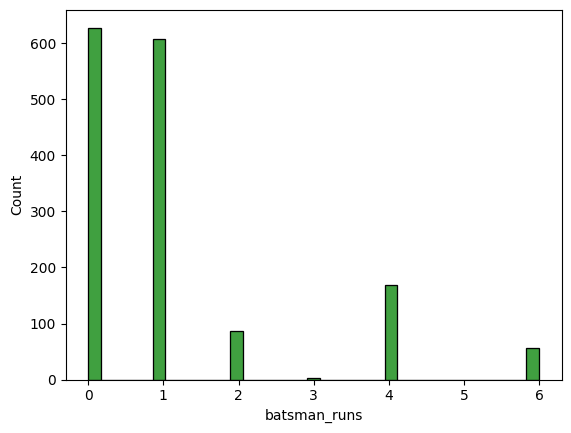

In [ ]:
sns.histplot(data=df_kohli['batsman_runs'],color="g")

Text(0, 0.5, 'Count')

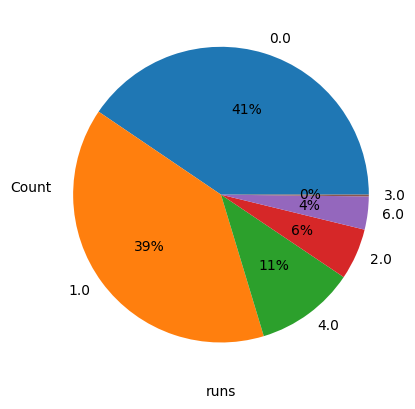

In [ ]:
df_kohli['batsman_runs'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.xlabel('runs',rotation='horizontal')
plt.ylabel('Count',rotation='horizontal')

###📌 Interesting fact is that Virat Kohli has scored more runs by taking singles than by hitting 6

#3) Toss decision across seasons :

In [ ]:
matches_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
matches_data['Season'] = pd.to_datetime(matches_data['date']).dt.year

In [ ]:
matches_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2',
       'Season'],
      dtype='object')

In [ ]:
matches_data.groupby(['Season' , 'toss_decision']).size()

Season  toss_decision
2008    bat              26
        field            32
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    bat              25
        field            48
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    bat              19
        field            41
2015    bat              25
        field            34
2016    bat              11
        field            49
2017    bat              11
        field            48
2018    bat              10
        field            50
2019    bat              10
        field            50
2020    bat              27
        field            33
dtype: int64

In [ ]:
type(matches_data.groupby(['Season' , 'toss_decision']).size())

pandas.core.series.Series

In [ ]:
# converting above Series into Dataframe..
season_toss_count_df = matches_data.groupby(['Season' , 'toss_decision']).size().reset_index().rename(columns={0:'count'})
season_toss_count_df

,Season,toss_decision,count
0,2008,bat,26
1,2008,field,32
2,2009,bat,35
3,2009,field,22
4,2010,bat,39
5,2010,field,21
6,2011,bat,25
7,2011,field,48
8,2012,bat,37
9,2012,field,37


<Axes: xlabel='Season', ylabel='count'>

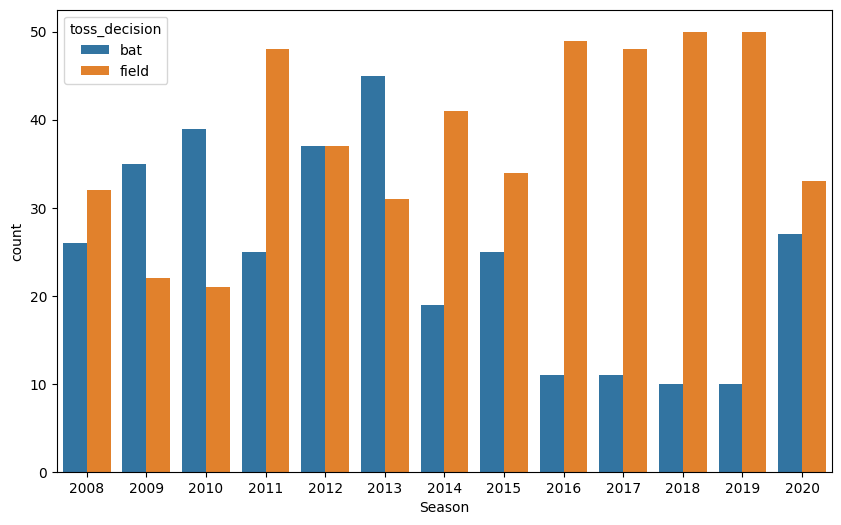

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Season' , y='count' , hue = 'toss_decision' , data = season_toss_count_df)

## plotting barplot of "Season" vs "count" for bat & field both ..

###📌Most of the times, teams decide to feild first except in season 2009,2010,2013 where teams decided to bat first mostly.
###Since 2014, teams have overwhelmingly chosen to bat second. Especially since 2016, teams have chosen to field for more than 80% of the times except in season 2020.

#4) Does Winning toss implies winning game ?

In [ ]:
matches_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2',
       'Season'],
      dtype='object')

In [ ]:
matches_data[['team1', 'team2' , 'toss_winner' , 'winner']]

,team1,team2,toss_winner,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,Royal Challengers Bangalore
812,Mumbai Indians,Delhi Capitals,Delhi Capitals,Mumbai Indians
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals


In [ ]:
# if "toss_winner" equals to "match_winner" , then assign "Yes" else assign "No"

matches_data['toss_win__game_win'] = np.where(matches_data['toss_winner']==matches_data['winner'] , 'Yes' , 'No')

In [ ]:
matches_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Season',
       'toss_win__game_win'],
      dtype='object')

In [ ]:
matches_data['toss_win__game_win'].value_counts()

Yes    418
No     398
Name: toss_win__game_win, dtype: int64

In [ ]:
matches_data['toss_win__game_win'].value_counts().values

array([418, 398])

<Axes: ylabel='toss_win__game_win'>

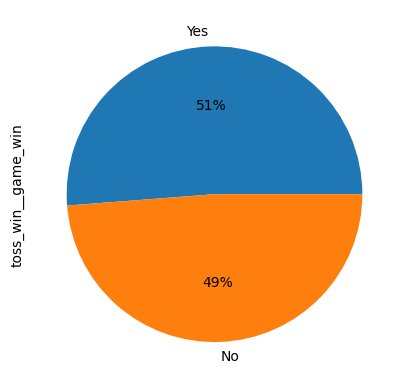

In [ ]:
matches_data['toss_win__game_win'].value_counts().plot(kind="pie",autopct='%1.0f%%')

<Axes: xlabel='toss_win__game_win', ylabel='Count'>

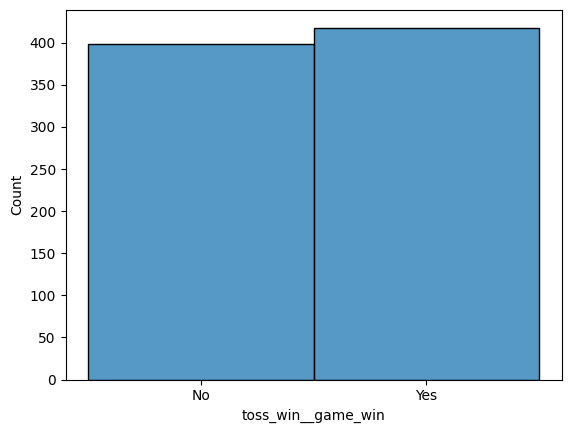

In [ ]:
sns.histplot(data=matches_data['toss_win__game_win'])


###📌Though winning toss gives you an advantage but it doesn't significantly implies that winning the toss helps in winning the game.

#5) Number of times team have won the tournament :

In [ ]:
matches_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Season',
       'toss_win__game_win'],
      dtype='object')

In [ ]:
matches_data['Season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [ ]:
df_2018 = matches_data[matches_data['Season']==2018] ## lets extract data of "2018" year only..
df_2018

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win__game_win
636,1136561,Mumbai,2018-04-07,DJ Bravo,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore,2018,Yes
637,1136562,Chandigarh,2018-04-08,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,KN Ananthapadmanabhan,RJ Tucker,2018,Yes
638,1136563,Kolkata,2018-04-08,SP Narine,Eden Gardens,0,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,4.0,N,NaN,C Shamshuddin,A Deshmukh,2018,Yes
639,1136564,Hyderabad,2018-04-09,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,9.0,N,NaN,VA Kulkarni,NJ Llong,2018,Yes
640,1136565,Chennai,2018-04-10,SW Billings,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,CB Gaffaney,AK Chaudhary,2018,Yes
641,1136566,Jaipur,2018-04-11,SV Samson,Sawai Mansingh Stadium,0,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,Rajasthan Royals,runs,10.0,N,D/L,KN Ananthapadmanabhan,Nitin Menon,2018,No
642,1136567,Hyderabad,2018-04-12,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,1.0,N,NaN,NJ Llong,CK Nandan,2018,Yes
643,1136568,Bengaluru,2018-04-13,UT Yadav,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,N,NaN,A Deshmukh,S Ravi,2018,Yes
644,1136569,Mumbai,2018-04-14,JJ Roy,Wankhede Stadium,0,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,Delhi Daredevils,wickets,7.0,N,NaN,KN Ananthapadmanabhan,Nitin Menon,2018,Yes
645,1136570,Kolkata,2018-04-14,B Stanlake,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,5.0,N,NaN,AK Chaudhary,A Nand Kishore,2018,Yes


In [ ]:
df_2018['winner'].tail(1).values[0] ## winner of "2018" season

'Chennai Super Kings'

In [ ]:
# Lets create dictionary to store winners of every season..

winners_team ={}

for year in sorted(matches_data['Season'].unique()):
    current_yr_df = matches_data[matches_data['Season']==year]
    winners_team[year] = current_yr_df['winner'].tail(1).values[0]

winners_team

{2008: 'Rajasthan Royals',
 2009: 'Deccan Chargers',
 2010: 'Chennai Super Kings',
 2011: 'Chennai Super Kings',
 2012: 'Kolkata Knight Riders',
 2013: 'Mumbai Indians',
 2014: 'Kolkata Knight Riders',
 2015: 'Mumbai Indians',
 2016: 'Sunrisers Hyderabad',
 2017: 'Mumbai Indians',
 2018: 'Chennai Super Kings',
 2019: 'Mumbai Indians',
 2020: 'Mumbai Indians'}

In [ ]:
winners_team.values()

dict_values(['Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Mumbai Indians', 'Kolkata Knight Riders', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Mumbai Indians', 'Chennai Super Kings', 'Mumbai Indians', 'Mumbai Indians'])

In [ ]:
from collections import Counter

In [ ]:
Counter(winners_team.values())

Counter({'Rajasthan Royals': 1,
         'Deccan Chargers': 1,
         'Chennai Super Kings': 3,
         'Kolkata Knight Riders': 2,
         'Mumbai Indians': 5,
         'Sunrisers Hyderabad': 1})

###📌Mumbai Indians have won the tournament most

#6) Most number of wins :

In [ ]:
matches_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Season',
       'toss_win__game_win'],
      dtype='object')

In [ ]:
matches_data[['team1', 'team2']]

,team1,team2
0,Royal Challengers Bangalore,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals
3,Mumbai Indians,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers
...,...,...
811,Royal Challengers Bangalore,Mumbai Indians
812,Mumbai Indians,Delhi Capitals
813,Royal Challengers Bangalore,Sunrisers Hyderabad
814,Delhi Capitals,Sunrisers Hyderabad


In [ ]:
matches_played = matches_data['team1'].value_counts() + matches_data['team2'].value_counts()

In [ ]:
type(matches_played)

pandas.core.series.Series

In [ ]:
matches_played_df = matches_played.to_frame().reset_index()

In [ ]:
matches_played_df.columns = ['team_name' , 'Matches_played']

In [ ]:
matches_played_df

,team_name,Matches_played
0,Chennai Super Kings,178
1,Deccan Chargers,75
2,Delhi Capitals,33
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,190
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,192
8,Mumbai Indians,203
9,Pune Warriors,46


In [ ]:
wins = pd.DataFrame(matches_data['winner'].value_counts()).reset_index()

In [ ]:
wins.columns = ['team_name' , 'Wins']
wins

,team_name,Wins
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


In [ ]:
played =matches_played_df.merge(wins, on='team_name' , how='inner' )

In [ ]:
played

,team_name,Matches_played,Wins
0,Chennai Super Kings,178,106
1,Deccan Chargers,75,29
2,Delhi Capitals,33,19
3,Delhi Daredevils,161,67
4,Gujarat Lions,30,13
5,Kings XI Punjab,190,88
6,Kochi Tuskers Kerala,14,6
7,Kolkata Knight Riders,192,99
8,Mumbai Indians,203,120
9,Pune Warriors,46,12


<Axes: xlabel='team_name'>

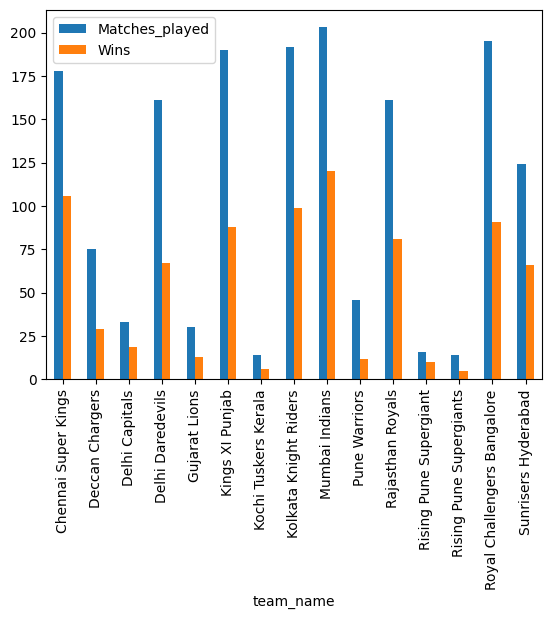

In [ ]:
played.plot(x='team_name',kind="bar")

### Mumbai Indians & Chennai Super Kings have interesting winning numbers


